In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

## For df1:

### Take a look at the data in df1.

In [4]:
df1.sample(10)

,group,x,time
63,a,5.283725,one
61,a,5.143308,one
157,a,4.516974,two
165,b,9.784357,two
83,a,4.924879,one
59,a,6.544544,one
60,a,4.760331,one
164,b,8.960880,two
120,b,6.496542,two
177,a,3.261989,two


In [3]:
df1.describe()

,x
count,200.000000
mean,6.511559
std,2.180756
min,0.556924
25%,4.895169
50%,6.507704
75%,8.261932
max,12.958625


### Does x increase from time one to time two?

In [29]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [12]:
df1[df1.time == 'two'].x.mean()

7.296448106590939

### Visualize the relationship between x and time.

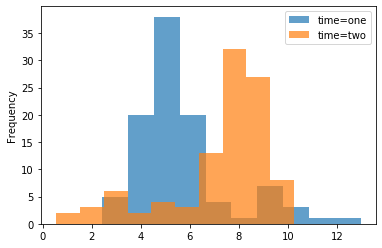

In [32]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two', alpha=.7)
ax.legend()

In [34]:
df1.groupby(['group', 'time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

[Text(0.5, 1.0, 'Time Two')]

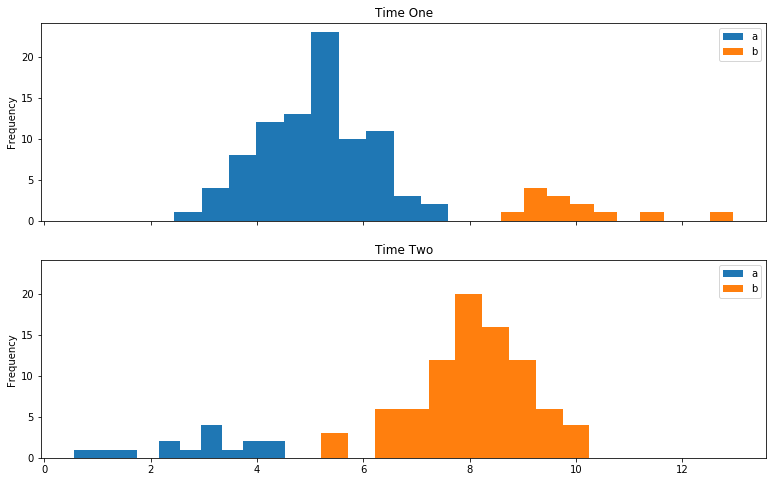

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.query('group == "a" & time == "one"').x.plot.hist(ax=ax1, label='a')
df1.query('group == "b" & time == "one"').x.plot.hist(ax=ax1, label='b')
ax1.set(title='Time One')
ax1.legend()
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label='b')
ax2.legend()
ax2.set(title='Time Two')

### Run a statistical test to further examine the relationship between these features.

In [7]:
x1 = df1[df1.time == 'one'].x
x2 = df1[df1.time == 'two'].x

In [10]:
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-5.443902721870272, pvalue=1.5320971681720527e-07)

## For df2:
### Take a look at the data in df2.

In [13]:
df2.sample(10)

,x,y,group
53,103.294912,555.248274,b
67,94.502574,592.374488,b
27,100.213958,613.026511,a
87,100.917910,572.159722,b
180,108.563909,654.973215,d
182,107.443888,652.564372,d
130,86.198678,582.461316,c
11,104.215873,608.895716,a
187,110.623694,626.940299,d
109,91.836051,630.640352,c


### Visualize the relationship between x and y.

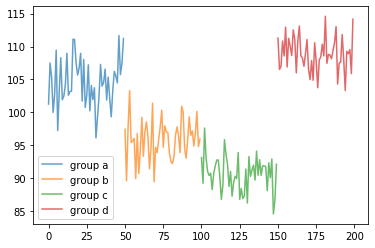

In [38]:
ax = df2[df2.group == 'a'].x.plot.line(label='group a', alpha=.7)
df2[df2.group == 'b'].x.plot.line(label='group b', alpha=.7)
df2[df2.group == 'c'].x.plot.line(label='group c', alpha=.7)
df2[df2.group == 'd'].x.plot.line(label='group d', alpha=.7)
ax.legend()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df2.query('group == "a"').x.plot(ax=ax, label='a')
df2.query('group == "b"').x.plot(ax=ax, label='b')
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label='b')
ax2.legend()
ax2.set(title='Time Two')

### How would you describe the relationship between x and y?

### Run a statistical test to examine the relationship between x and y.

In [17]:
corr, p = stats.pearsonr(df2.x, df2.y)

In [18]:
print(corr, p)

0.5693902765694359 1.3960403186191819e-18


## For df3:
### Take a look at the data in df3

In [19]:
df3.sample(10)

,surgeon,surgery,success
241,B,heart bypass,1
522,A,appendectomy,1
389,B,heart bypass,0
118,B,heart bypass,1
761,B,heart bypass,1
884,A,appendectomy,1
329,A,heart bypass,0
474,A,appendectomy,1
749,B,heart bypass,1
902,B,heart bypass,1


### Which surgeon has the higher success rate?

In [30]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [31]:
df3.groupby(['surgeon', 'surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

### If you had to have heart bypass surgery, which surgeon should you go to?

I would choose surgeon B, they have a lot more experience with heart bypass surgery.